In [1]:
from matplotlib import pyplot as plt
import multigrate as mtg
import scanpy as sc
import numpy as np
import pandas as pd
import scvi
import random # we don't fix seed here so can use to re sample test patients

Global seed set to 0


In [2]:
import seaborn as sns

In [3]:
# if want to change global seed to sth else
seed = 0
from scvi._settings import settings
settings.seed = seed

Global seed set to 0


In [4]:
sc.set_figure_params(dpi=100, frameon=False)

# Read data

In [5]:
adata = sc.read('data/TICatlas_prep.h5ad')
adata

AnnData object with n_obs × n_vars = 317111 × 4000
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient', 'percent.mt', 'gender', 'source', 'subtype', 'cluster_kmeans_k6', 'cell_type', 'batch'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_umap'

In [8]:
adata = adata[idx].copy()

In [7]:
idx = adata.obs['patient'].sort_values().index # need to sort by patient for the data loader

In [57]:
adata.obs.gender

X121270372023221_1_1_1_1-0     female
X118903785320532720_1_1_1-0    female
X118903785324231008_1_1_1-0    female
X118903785324427696_1_1_1-0    female
X118903785326819632_1_1_1-0    female
                                ...  
GCGCAGTTCACTGGGC_11_17-0       female
GCATGTAAGGCCATAG_11_17-0       female
GCATGTAAGCATGGCA_11_17-0       female
GTAGGCCTCGGACAAG_11_17-0       female
TTGACTTCAGCTCGAC_11_17-0       female
Name: gender, Length: 273714, dtype: category
Categories (4, object): ['NA', 'female', 'male', 'unknown']

# MIL

In [59]:
adata_test.obs.gender

GGTGAAGAGACCGGAT-9_5-1     male
GCAGCCATCTGCAAGT-9_5-1     male
GCAGTTATCATTATCC-9_5-1     male
GCATGATTCACGCATA-9_5-1     male
GCATGCGGTGAGGCTA-9_5-1     male
                           ... 
CGTCAGGTCAGTGTTG_9_17-1    male
CGTCAGGTCCTTAATC_9_17-1    male
CGTCCATAGCCAGTTT_9_17-1    male
CGTCCATAGCGCCTTG_9_17-1    male
CGTCAGGCATCCAACA_9_17-1    male
Name: gender, Length: 43397, dtype: category
Categories (4, object): ['NA', 'female', 'male', 'unknown']

In [27]:
# subset
adata_test = adata[adata.obs.split == "test"].copy()
adata = adata[adata.obs.split == "train"].copy()

In [28]:
mtg.model.MultiVAE_MIL.setup_anndata(
            adata, 
            class_label="subtype",
            rna_indices_end=4000,
            categorical_covariate_keys=['gender',"patient"],
            continuous_covariate_keys=None,)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 273714 cells, 4000 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 3 extra categorical covariates   
         and 1 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [30]:
mil = mtg.model.MultiVAE_MIL(
            adata, 
            modality_lengths=[4000],
            losses=['nb'],
            loss_coefs={'kl': 0.0001, 'integ': 0},
            class_label='subtype',
            patient_label='patient',
            scoring='gated_attn', # or 'attn'
            class_layers=2,
            add_patient_to_classifier=False, # whether to use patient embeddings for classification
            hierarchical_attn=True, # whether to have hierarchical attention or just cell attention,
            )

In [31]:
mil.train(max_epochs=150, 
    batch_size=256, n_epochs_kl_warmup=50)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/150:   1%|          | 1/150 [00:21<54:05, 21.78s/it, loss=5.69e+03, v_num=1]

Metric elbo_validation improved. New best score: 5023.570


Epoch 2/150:   1%|▏         | 2/150 [00:42<52:11, 21.16s/it, loss=2.03e+04, v_num=1]

Metric elbo_validation improved by 109.814 >= min_delta = 0.0. New best score: 4913.756


Epoch 3/150:   2%|▏         | 3/150 [01:03<51:06, 20.86s/it, loss=5.79e+03, v_num=1]

Metric elbo_validation improved by 56.033 >= min_delta = 0.0. New best score: 4857.724


Epoch 4/150:   3%|▎         | 4/150 [01:23<50:04, 20.58s/it, loss=5.71e+03, v_num=1]

Metric elbo_validation improved by 40.090 >= min_delta = 0.0. New best score: 4817.633


Epoch 5/150:   3%|▎         | 5/150 [01:43<49:37, 20.53s/it, loss=1.95e+04, v_num=1]

Metric elbo_validation improved by 48.093 >= min_delta = 0.0. New best score: 4769.541


Epoch 6/150:   4%|▍         | 6/150 [02:04<49:10, 20.49s/it, loss=5.74e+03, v_num=1]

Metric elbo_validation improved by 32.543 >= min_delta = 0.0. New best score: 4736.997


Epoch 7/150:   5%|▍         | 7/150 [02:24<48:55, 20.53s/it, loss=5.53e+03, v_num=1]

Metric elbo_validation improved by 39.620 >= min_delta = 0.0. New best score: 4697.377


Epoch 8/150:   5%|▌         | 8/150 [02:45<48:22, 20.44s/it, loss=5.9e+03, v_num=1] 

Metric elbo_validation improved by 19.293 >= min_delta = 0.0. New best score: 4678.084


Epoch 9/150:   6%|▌         | 9/150 [03:05<48:05, 20.46s/it, loss=5.92e+03, v_num=1]

Metric elbo_validation improved by 32.377 >= min_delta = 0.0. New best score: 4645.708


Epoch 11/150:   7%|▋         | 11/150 [03:46<47:26, 20.48s/it, loss=6e+03, v_num=1]   

Metric elbo_validation improved by 25.105 >= min_delta = 0.0. New best score: 4620.602


Epoch 12/150:   8%|▊         | 12/150 [04:06<46:52, 20.38s/it, loss=4.3e+03, v_num=1]

Metric elbo_validation improved by 25.224 >= min_delta = 0.0. New best score: 4595.378


Epoch 13/150:   9%|▊         | 13/150 [04:27<46:42, 20.46s/it, loss=5.62e+03, v_num=1]

Metric elbo_validation improved by 1.917 >= min_delta = 0.0. New best score: 4593.461


Epoch 14/150:   9%|▉         | 14/150 [04:47<46:10, 20.37s/it, loss=4.7e+03, v_num=1] 

Metric elbo_validation improved by 25.974 >= min_delta = 0.0. New best score: 4567.487


Epoch 15/150:  10%|█         | 15/150 [05:08<46:06, 20.49s/it, loss=7.25e+03, v_num=1]

Metric elbo_validation improved by 38.288 >= min_delta = 0.0. New best score: 4529.199


Epoch 16/150:  11%|█         | 16/150 [05:28<45:30, 20.38s/it, loss=5.61e+03, v_num=1]

Metric elbo_validation improved by 13.843 >= min_delta = 0.0. New best score: 4515.356


Epoch 17/150:  11%|█▏        | 17/150 [05:48<45:17, 20.43s/it, loss=5.95e+03, v_num=1]

Metric elbo_validation improved by 8.714 >= min_delta = 0.0. New best score: 4506.642


Epoch 18/150:  12%|█▏        | 18/150 [06:09<44:47, 20.36s/it, loss=4.3e+03, v_num=1] 

Metric elbo_validation improved by 39.670 >= min_delta = 0.0. New best score: 4466.972


Epoch 20/150:  13%|█▎        | 20/150 [06:49<44:07, 20.37s/it, loss=5.76e+03, v_num=1]

Metric elbo_validation improved by 23.138 >= min_delta = 0.0. New best score: 4443.834


Epoch 22/150:  15%|█▍        | 22/150 [07:30<43:18, 20.30s/it, loss=6.54e+03, v_num=1]

Metric elbo_validation improved by 27.635 >= min_delta = 0.0. New best score: 4416.199


Epoch 23/150:  15%|█▌        | 23/150 [07:50<42:46, 20.21s/it, loss=5.88e+03, v_num=1]

Metric elbo_validation improved by 1.782 >= min_delta = 0.0. New best score: 4414.417


Epoch 24/150:  16%|█▌        | 24/150 [08:11<42:50, 20.40s/it, loss=4.87e+03, v_num=1]

Metric elbo_validation improved by 32.744 >= min_delta = 0.0. New best score: 4381.673


Epoch 25/150:  17%|█▋        | 25/150 [08:31<42:25, 20.36s/it, loss=2.06e+04, v_num=1]

Metric elbo_validation improved by 17.878 >= min_delta = 0.0. New best score: 4363.795


Epoch 26/150:  17%|█▋        | 26/150 [08:52<42:13, 20.43s/it, loss=5.33e+03, v_num=1]

Metric elbo_validation improved by 3.126 >= min_delta = 0.0. New best score: 4360.669


Epoch 27/150:  18%|█▊        | 27/150 [09:12<41:45, 20.37s/it, loss=4.29e+03, v_num=1]

Metric elbo_validation improved by 33.954 >= min_delta = 0.0. New best score: 4326.716


Epoch 28/150:  19%|█▊        | 28/150 [09:33<41:31, 20.43s/it, loss=1.88e+04, v_num=1]

Metric elbo_validation improved by 7.390 >= min_delta = 0.0. New best score: 4319.326


Epoch 29/150:  19%|█▉        | 29/150 [09:53<41:10, 20.42s/it, loss=5.95e+03, v_num=1]

Metric elbo_validation improved by 5.375 >= min_delta = 0.0. New best score: 4313.951


Epoch 30/150:  20%|██        | 30/150 [10:13<40:55, 20.46s/it, loss=4.86e+03, v_num=1]

Metric elbo_validation improved by 26.921 >= min_delta = 0.0. New best score: 4287.030


Epoch 32/150:  21%|██▏       | 32/150 [10:54<40:15, 20.47s/it, loss=7.21e+03, v_num=1]

Metric elbo_validation improved by 9.892 >= min_delta = 0.0. New best score: 4277.139


Epoch 33/150:  22%|██▏       | 33/150 [11:15<39:51, 20.44s/it, loss=2.17e+04, v_num=1]

Metric elbo_validation improved by 20.730 >= min_delta = 0.0. New best score: 4256.408


Epoch 34/150:  23%|██▎       | 34/150 [11:35<39:33, 20.46s/it, loss=6.19e+03, v_num=1]

Metric elbo_validation improved by 33.312 >= min_delta = 0.0. New best score: 4223.096


Epoch 36/150:  24%|██▍       | 36/150 [12:16<38:46, 20.41s/it, loss=1.84e+04, v_num=1]

Metric elbo_validation improved by 20.949 >= min_delta = 0.0. New best score: 4202.147


Epoch 37/150:  25%|██▍       | 37/150 [12:36<38:18, 20.34s/it, loss=5.08e+03, v_num=1]

Metric elbo_validation improved by 5.488 >= min_delta = 0.0. New best score: 4196.659


Epoch 38/150:  25%|██▌       | 38/150 [12:57<38:11, 20.46s/it, loss=5.61e+03, v_num=1]

Metric elbo_validation improved by 25.435 >= min_delta = 0.0. New best score: 4171.225


Epoch 39/150:  26%|██▌       | 39/150 [13:17<37:50, 20.45s/it, loss=4.52e+03, v_num=1]

Metric elbo_validation improved by 0.618 >= min_delta = 0.0. New best score: 4170.607


Epoch 40/150:  27%|██▋       | 40/150 [13:38<37:31, 20.46s/it, loss=4.71e+03, v_num=1]

Metric elbo_validation improved by 14.894 >= min_delta = 0.0. New best score: 4155.713


Epoch 41/150:  27%|██▋       | 41/150 [13:58<37:06, 20.43s/it, loss=5.83e+03, v_num=1]

Metric elbo_validation improved by 31.478 >= min_delta = 0.0. New best score: 4124.235


Epoch 42/150:  28%|██▊       | 42/150 [14:19<37:00, 20.56s/it, loss=4.41e+03, v_num=1]

Metric elbo_validation improved by 20.737 >= min_delta = 0.0. New best score: 4103.498


Epoch 43/150:  29%|██▊       | 43/150 [14:39<36:34, 20.51s/it, loss=6.13e+03, v_num=1]

Metric elbo_validation improved by 2.874 >= min_delta = 0.0. New best score: 4100.624


Epoch 44/150:  29%|██▉       | 44/150 [15:00<36:14, 20.51s/it, loss=5.22e+03, v_num=1]

Metric elbo_validation improved by 1.422 >= min_delta = 0.0. New best score: 4099.202


Epoch 45/150:  30%|███       | 45/150 [15:20<35:46, 20.44s/it, loss=4.76e+03, v_num=1]

Metric elbo_validation improved by 21.413 >= min_delta = 0.0. New best score: 4077.789


Epoch 46/150:  31%|███       | 46/150 [15:41<35:35, 20.53s/it, loss=2.34e+04, v_num=1]

Metric elbo_validation improved by 12.772 >= min_delta = 0.0. New best score: 4065.017


Epoch 47/150:  31%|███▏      | 47/150 [16:01<35:07, 20.46s/it, loss=5.08e+03, v_num=1]

Metric elbo_validation improved by 12.433 >= min_delta = 0.0. New best score: 4052.584


Epoch 48/150:  32%|███▏      | 48/150 [16:22<34:46, 20.46s/it, loss=5.46e+03, v_num=1]

Metric elbo_validation improved by 5.859 >= min_delta = 0.0. New best score: 4046.725


Epoch 49/150:  33%|███▎      | 49/150 [16:42<34:19, 20.39s/it, loss=6.17e+03, v_num=1]

Metric elbo_validation improved by 31.172 >= min_delta = 0.0. New best score: 4015.553


Epoch 51/150:  34%|███▍      | 51/150 [17:23<33:41, 20.42s/it, loss=5.33e+03, v_num=1]

Metric elbo_validation improved by 6.591 >= min_delta = 0.0. New best score: 4008.962


Epoch 52/150:  35%|███▍      | 52/150 [17:43<33:26, 20.47s/it, loss=5.03e+03, v_num=1]

Metric elbo_validation improved by 21.975 >= min_delta = 0.0. New best score: 3986.987


Epoch 53/150:  35%|███▌      | 53/150 [18:04<33:00, 20.42s/it, loss=1.61e+04, v_num=1]

Metric elbo_validation improved by 16.697 >= min_delta = 0.0. New best score: 3970.290


Epoch 54/150:  36%|███▌      | 54/150 [18:24<32:45, 20.47s/it, loss=5.36e+03, v_num=1]

Metric elbo_validation improved by 3.967 >= min_delta = 0.0. New best score: 3966.323


Epoch 55/150:  37%|███▋      | 55/150 [18:45<32:24, 20.46s/it, loss=7.12e+03, v_num=1]

Metric elbo_validation improved by 17.956 >= min_delta = 0.0. New best score: 3948.367


Epoch 56/150:  37%|███▋      | 56/150 [19:05<32:08, 20.51s/it, loss=4.26e+03, v_num=1]

Metric elbo_validation improved by 7.608 >= min_delta = 0.0. New best score: 3940.760


Epoch 58/150:  39%|███▊      | 58/150 [19:46<31:26, 20.51s/it, loss=5.26e+03, v_num=1]

Metric elbo_validation improved by 18.251 >= min_delta = 0.0. New best score: 3922.509


Epoch 59/150:  39%|███▉      | 59/150 [20:07<30:58, 20.43s/it, loss=5.82e+03, v_num=1]

Metric elbo_validation improved by 8.526 >= min_delta = 0.0. New best score: 3913.983


Epoch 60/150:  40%|████      | 60/150 [20:27<30:44, 20.50s/it, loss=4.92e+03, v_num=1]

Metric elbo_validation improved by 15.438 >= min_delta = 0.0. New best score: 3898.544


Epoch 61/150:  41%|████      | 61/150 [20:48<30:20, 20.45s/it, loss=2.06e+04, v_num=1]

Metric elbo_validation improved by 3.293 >= min_delta = 0.0. New best score: 3895.251


Epoch 62/150:  41%|████▏     | 62/150 [21:08<30:04, 20.50s/it, loss=2.02e+04, v_num=1]

Metric elbo_validation improved by 9.104 >= min_delta = 0.0. New best score: 3886.147


Epoch 64/150:  43%|████▎     | 64/150 [21:49<29:13, 20.39s/it, loss=6.19e+03, v_num=1]

Metric elbo_validation improved by 22.821 >= min_delta = 0.0. New best score: 3863.326


Epoch 65/150:  43%|████▎     | 65/150 [22:09<28:52, 20.38s/it, loss=1.54e+04, v_num=1]

Metric elbo_validation improved by 3.612 >= min_delta = 0.0. New best score: 3859.714


Epoch 66/150:  44%|████▍     | 66/150 [22:29<28:32, 20.38s/it, loss=5.08e+03, v_num=1]

Metric elbo_validation improved by 20.553 >= min_delta = 0.0. New best score: 3839.161


Epoch 68/150:  45%|████▌     | 68/150 [23:11<28:01, 20.51s/it, loss=4.58e+03, v_num=1]

Metric elbo_validation improved by 20.850 >= min_delta = 0.0. New best score: 3818.311


Epoch 69/150:  46%|████▌     | 69/150 [23:31<27:47, 20.59s/it, loss=4.79e+03, v_num=1]

Metric elbo_validation improved by 3.410 >= min_delta = 0.0. New best score: 3814.901


Epoch 70/150:  47%|████▋     | 70/150 [23:52<27:19, 20.49s/it, loss=3.28e+03, v_num=1]

Metric elbo_validation improved by 5.098 >= min_delta = 0.0. New best score: 3809.802


Epoch 71/150:  47%|████▋     | 71/150 [24:12<26:57, 20.47s/it, loss=4.01e+03, v_num=1]

Metric elbo_validation improved by 2.206 >= min_delta = 0.0. New best score: 3807.596


Epoch 72/150:  48%|████▊     | 72/150 [24:32<26:31, 20.40s/it, loss=4.31e+03, v_num=1]

Metric elbo_validation improved by 21.456 >= min_delta = 0.0. New best score: 3786.140


Epoch 73/150:  49%|████▊     | 73/150 [24:53<26:17, 20.48s/it, loss=4.31e+03, v_num=1]

Metric elbo_validation improved by 9.284 >= min_delta = 0.0. New best score: 3776.856


Epoch 75/150:  50%|█████     | 75/150 [25:34<25:32, 20.43s/it, loss=4.91e+03, v_num=1]

Metric elbo_validation improved by 21.523 >= min_delta = 0.0. New best score: 3755.333


Epoch 76/150:  51%|█████     | 76/150 [25:54<25:07, 20.37s/it, loss=5.31e+03, v_num=1]

Metric elbo_validation improved by 2.528 >= min_delta = 0.0. New best score: 3752.804


Epoch 78/150:  52%|█████▏    | 78/150 [26:35<24:31, 20.43s/it, loss=4.53e+03, v_num=1]

Metric elbo_validation improved by 5.586 >= min_delta = 0.0. New best score: 3747.219


Epoch 79/150:  53%|█████▎    | 79/150 [26:56<24:15, 20.49s/it, loss=1.83e+04, v_num=1]

Metric elbo_validation improved by 22.624 >= min_delta = 0.0. New best score: 3724.595


Epoch 80/150:  53%|█████▎    | 80/150 [27:16<23:51, 20.45s/it, loss=1.82e+04, v_num=1]

Metric elbo_validation improved by 5.862 >= min_delta = 0.0. New best score: 3718.733


Epoch 83/150:  55%|█████▌    | 83/150 [28:18<22:56, 20.55s/it, loss=1.54e+04, v_num=1]

Metric elbo_validation improved by 29.354 >= min_delta = 0.0. New best score: 3689.379


Epoch 84/150:  56%|█████▌    | 84/150 [28:38<22:31, 20.48s/it, loss=1.57e+04, v_num=1]

Metric elbo_validation improved by 4.028 >= min_delta = 0.0. New best score: 3685.351


Epoch 85/150:  57%|█████▋    | 85/150 [28:59<22:13, 20.51s/it, loss=1.57e+04, v_num=1]

Metric elbo_validation improved by 6.814 >= min_delta = 0.0. New best score: 3678.537


Epoch 87/150:  58%|█████▊    | 87/150 [29:40<21:32, 20.52s/it, loss=3.74e+03, v_num=1]

Metric elbo_validation improved by 1.585 >= min_delta = 0.0. New best score: 3676.952


Epoch 88/150:  59%|█████▊    | 88/150 [30:00<21:09, 20.48s/it, loss=4.49e+03, v_num=1]

Metric elbo_validation improved by 6.567 >= min_delta = 0.0. New best score: 3670.385


Epoch 89/150:  59%|█████▉    | 89/150 [30:21<20:52, 20.54s/it, loss=4.3e+03, v_num=1] 

Metric elbo_validation improved by 19.417 >= min_delta = 0.0. New best score: 3650.968


Epoch 91/150:  61%|██████    | 91/150 [31:02<20:12, 20.55s/it, loss=5.16e+03, v_num=1]

Metric elbo_validation improved by 2.827 >= min_delta = 0.0. New best score: 3648.141


Epoch 93/150:  62%|██████▏   | 93/150 [31:43<19:32, 20.57s/it, loss=5.41e+03, v_num=1]

Metric elbo_validation improved by 17.852 >= min_delta = 0.0. New best score: 3630.290


Epoch 94/150:  63%|██████▎   | 94/150 [32:03<19:06, 20.47s/it, loss=3.35e+03, v_num=1]

Metric elbo_validation improved by 5.535 >= min_delta = 0.0. New best score: 3624.755


Epoch 95/150:  63%|██████▎   | 95/150 [32:24<18:51, 20.57s/it, loss=4.52e+03, v_num=1]

Metric elbo_validation improved by 13.496 >= min_delta = 0.0. New best score: 3611.259


Epoch 96/150:  64%|██████▍   | 96/150 [32:44<18:24, 20.46s/it, loss=4.71e+03, v_num=1]

Metric elbo_validation improved by 8.938 >= min_delta = 0.0. New best score: 3602.321


Epoch 97/150:  65%|██████▍   | 97/150 [33:05<18:03, 20.45s/it, loss=1.47e+04, v_num=1]

Metric elbo_validation improved by 4.493 >= min_delta = 0.0. New best score: 3597.828


Epoch 99/150:  66%|██████▌   | 99/150 [33:45<17:24, 20.48s/it, loss=4.57e+03, v_num=1]

Metric elbo_validation improved by 7.841 >= min_delta = 0.0. New best score: 3589.987


Epoch 100/150:  67%|██████▋   | 100/150 [34:06<17:03, 20.47s/it, loss=4.25e+03, v_num=1]

Metric elbo_validation improved by 11.557 >= min_delta = 0.0. New best score: 3578.430


Epoch 102/150:  68%|██████▊   | 102/150 [34:47<16:21, 20.44s/it, loss=5.99e+03, v_num=1]

Metric elbo_validation improved by 6.897 >= min_delta = 0.0. New best score: 3571.533


Epoch 104/150:  69%|██████▉   | 104/150 [35:28<15:38, 20.40s/it, loss=1.7e+04, v_num=1] 

Metric elbo_validation improved by 6.849 >= min_delta = 0.0. New best score: 3564.684


Epoch 105/150:  70%|███████   | 105/150 [35:48<15:22, 20.49s/it, loss=3.24e+03, v_num=1]

Metric elbo_validation improved by 9.862 >= min_delta = 0.0. New best score: 3554.822


Epoch 106/150:  71%|███████   | 106/150 [36:08<14:57, 20.39s/it, loss=3.83e+03, v_num=1]

Metric elbo_validation improved by 12.751 >= min_delta = 0.0. New best score: 3542.071


Epoch 108/150:  72%|███████▏  | 108/150 [36:49<14:15, 20.38s/it, loss=3.63e+03, v_num=1]

Metric elbo_validation improved by 19.868 >= min_delta = 0.0. New best score: 3522.203


Epoch 111/150:  74%|███████▍  | 111/150 [37:50<13:13, 20.34s/it, loss=4.74e+03, v_num=1]

Metric elbo_validation improved by 4.609 >= min_delta = 0.0. New best score: 3517.594


Epoch 112/150:  75%|███████▍  | 112/150 [38:11<12:55, 20.42s/it, loss=6.47e+03, v_num=1]

Metric elbo_validation improved by 2.492 >= min_delta = 0.0. New best score: 3515.101


Epoch 114/150:  76%|███████▌  | 114/150 [38:52<12:16, 20.47s/it, loss=1.79e+04, v_num=1]

Metric elbo_validation improved by 10.520 >= min_delta = 0.0. New best score: 3504.581


Epoch 115/150:  77%|███████▋  | 115/150 [39:12<11:53, 20.39s/it, loss=4.38e+03, v_num=1]

Metric elbo_validation improved by 3.389 >= min_delta = 0.0. New best score: 3501.193


Epoch 116/150:  77%|███████▋  | 116/150 [39:32<11:33, 20.40s/it, loss=4.53e+03, v_num=1]

Metric elbo_validation improved by 4.468 >= min_delta = 0.0. New best score: 3496.724


Epoch 117/150:  78%|███████▊  | 117/150 [39:52<11:10, 20.32s/it, loss=1.45e+04, v_num=1]

Metric elbo_validation improved by 3.031 >= min_delta = 0.0. New best score: 3493.694


Epoch 118/150:  79%|███████▊  | 118/150 [40:13<10:53, 20.41s/it, loss=3.83e+03, v_num=1]

Metric elbo_validation improved by 17.289 >= min_delta = 0.0. New best score: 3476.405


Epoch 121/150:  81%|████████  | 121/150 [41:14<09:49, 20.33s/it, loss=5.77e+03, v_num=1]

Metric elbo_validation improved by 9.612 >= min_delta = 0.0. New best score: 3466.794


Epoch 122/150:  81%|████████▏ | 122/150 [41:35<09:32, 20.45s/it, loss=3.7e+03, v_num=1] 

Metric elbo_validation improved by 13.589 >= min_delta = 0.0. New best score: 3453.205


Epoch 126/150:  84%|████████▍ | 126/150 [42:56<08:09, 20.38s/it, loss=1.44e+04, v_num=1]

Metric elbo_validation improved by 2.043 >= min_delta = 0.0. New best score: 3451.162


Epoch 127/150:  85%|████████▍ | 127/150 [43:17<07:48, 20.39s/it, loss=3.58e+03, v_num=1]

Metric elbo_validation improved by 4.157 >= min_delta = 0.0. New best score: 3447.004


Epoch 129/150:  86%|████████▌ | 129/150 [43:57<07:08, 20.41s/it, loss=4.57e+03, v_num=1]

Metric elbo_validation improved by 16.975 >= min_delta = 0.0. New best score: 3430.029


Epoch 130/150:  87%|████████▋ | 130/150 [44:18<06:49, 20.47s/it, loss=3.77e+03, v_num=1]

Metric elbo_validation improved by 2.661 >= min_delta = 0.0. New best score: 3427.368


Epoch 133/150:  89%|████████▊ | 133/150 [45:19<05:47, 20.45s/it, loss=2.21e+04, v_num=1]

Metric elbo_validation improved by 3.056 >= min_delta = 0.0. New best score: 3424.313


Epoch 134/150:  89%|████████▉ | 134/150 [45:40<05:28, 20.56s/it, loss=3.94e+03, v_num=1]

Metric elbo_validation improved by 16.313 >= min_delta = 0.0. New best score: 3407.999


Epoch 135/150:  90%|█████████ | 135/150 [46:01<05:07, 20.52s/it, loss=2.33e+04, v_num=1]

Metric elbo_validation improved by 1.489 >= min_delta = 0.0. New best score: 3406.510


Epoch 137/150:  91%|█████████▏| 137/150 [46:42<04:27, 20.55s/it, loss=3.92e+03, v_num=1]

Metric elbo_validation improved by 0.667 >= min_delta = 0.0. New best score: 3405.843


Epoch 138/150:  92%|█████████▏| 138/150 [47:02<04:06, 20.55s/it, loss=3.51e+03, v_num=1]

Metric elbo_validation improved by 9.935 >= min_delta = 0.0. New best score: 3395.908


Epoch 140/150:  93%|█████████▎| 140/150 [47:44<03:25, 20.53s/it, loss=1.37e+04, v_num=1]

Metric elbo_validation improved by 6.623 >= min_delta = 0.0. New best score: 3389.285


Epoch 143/150:  95%|█████████▌| 143/150 [48:45<02:22, 20.42s/it, loss=4.31e+03, v_num=1]

Metric elbo_validation improved by 2.085 >= min_delta = 0.0. New best score: 3387.200


Epoch 144/150:  96%|█████████▌| 144/150 [49:05<02:02, 20.45s/it, loss=1.33e+04, v_num=1]

Metric elbo_validation improved by 5.086 >= min_delta = 0.0. New best score: 3382.114


Epoch 145/150:  97%|█████████▋| 145/150 [49:25<01:42, 20.41s/it, loss=3.1e+03, v_num=1] 

Metric elbo_validation improved by 7.120 >= min_delta = 0.0. New best score: 3374.994


Epoch 146/150:  97%|█████████▋| 146/150 [49:46<01:21, 20.49s/it, loss=4.95e+03, v_num=1]

Metric elbo_validation improved by 3.849 >= min_delta = 0.0. New best score: 3371.145


Epoch 147/150:  98%|█████████▊| 147/150 [50:06<01:01, 20.40s/it, loss=4.28e+03, v_num=1]

Metric elbo_validation improved by 6.197 >= min_delta = 0.0. New best score: 3364.948


Epoch 150/150: 100%|██████████| 150/150 [51:08<00:00, 20.44s/it, loss=3.45e+03, v_num=1]

Metric elbo_validation improved by 9.060 >= min_delta = 0.0. New best score: 3355.888


Epoch 150/150: 100%|██████████| 150/150 [51:08<00:00, 20.46s/it, loss=3.45e+03, v_num=1]


In [ ]:
# save the model

In [32]:
mil.save("./models/ref_TIC_4k_genes")

In [33]:
mil_out = mil.get_latent_representation(batch_size=256)
latent, cell_attn, cov_attn, _ = mil_out

In [34]:
adata.obsm['latent'] = latent
adata.obs['cell_attn'] = cell_attn

In [35]:
# subsmaple the data for visualizaion 

In [36]:
adata_ss = sc.pp.subsample(adata, fraction=0.05, copy=True)

In [43]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


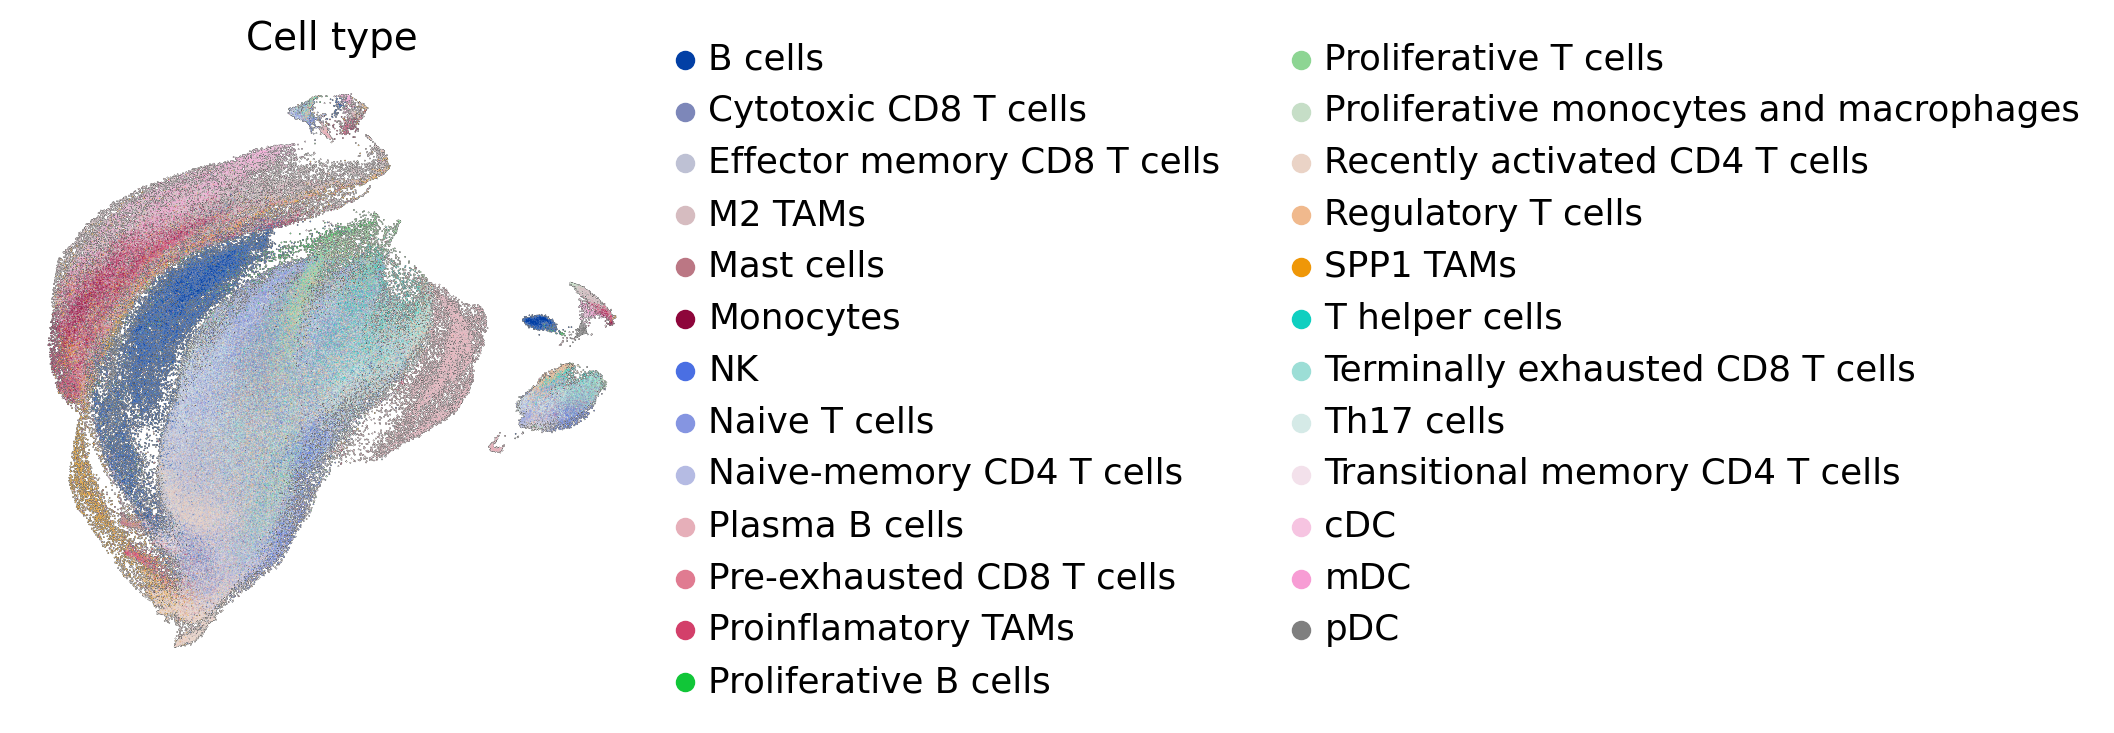

In [45]:
sc.pl.umap(adata, color=['cell_type']
           ,add_outline=True, title="Cell type")

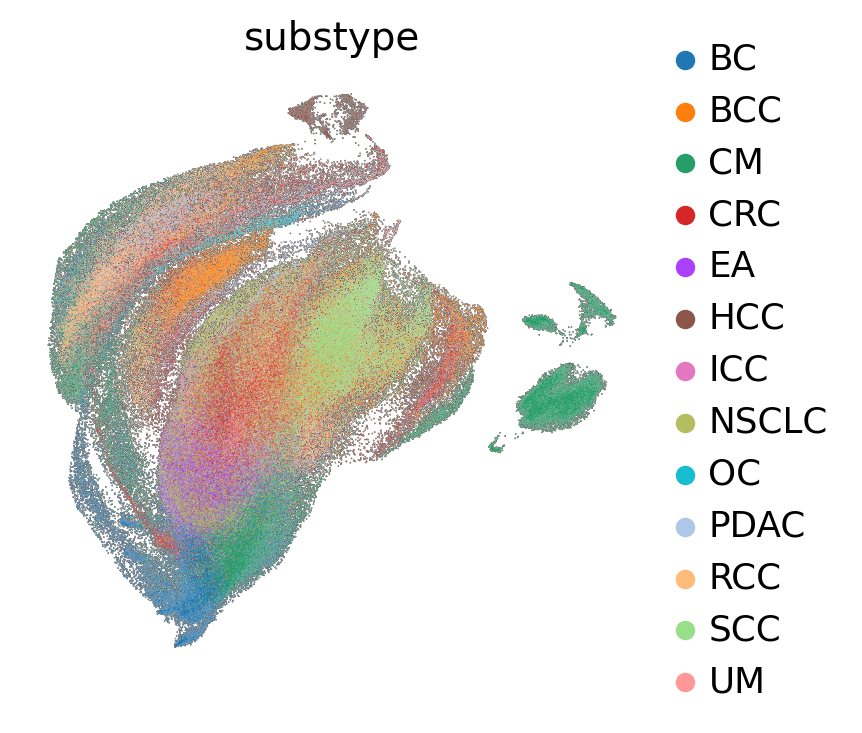

In [47]:
sc.pl.umap(adata, color=['subtype']
           ,add_outline=True, title="substype")

In [55]:
adata.obs.gender.value_counts()

female     116068
unknown     90265
male        45453
NA          21928
Name: gender, dtype: int64

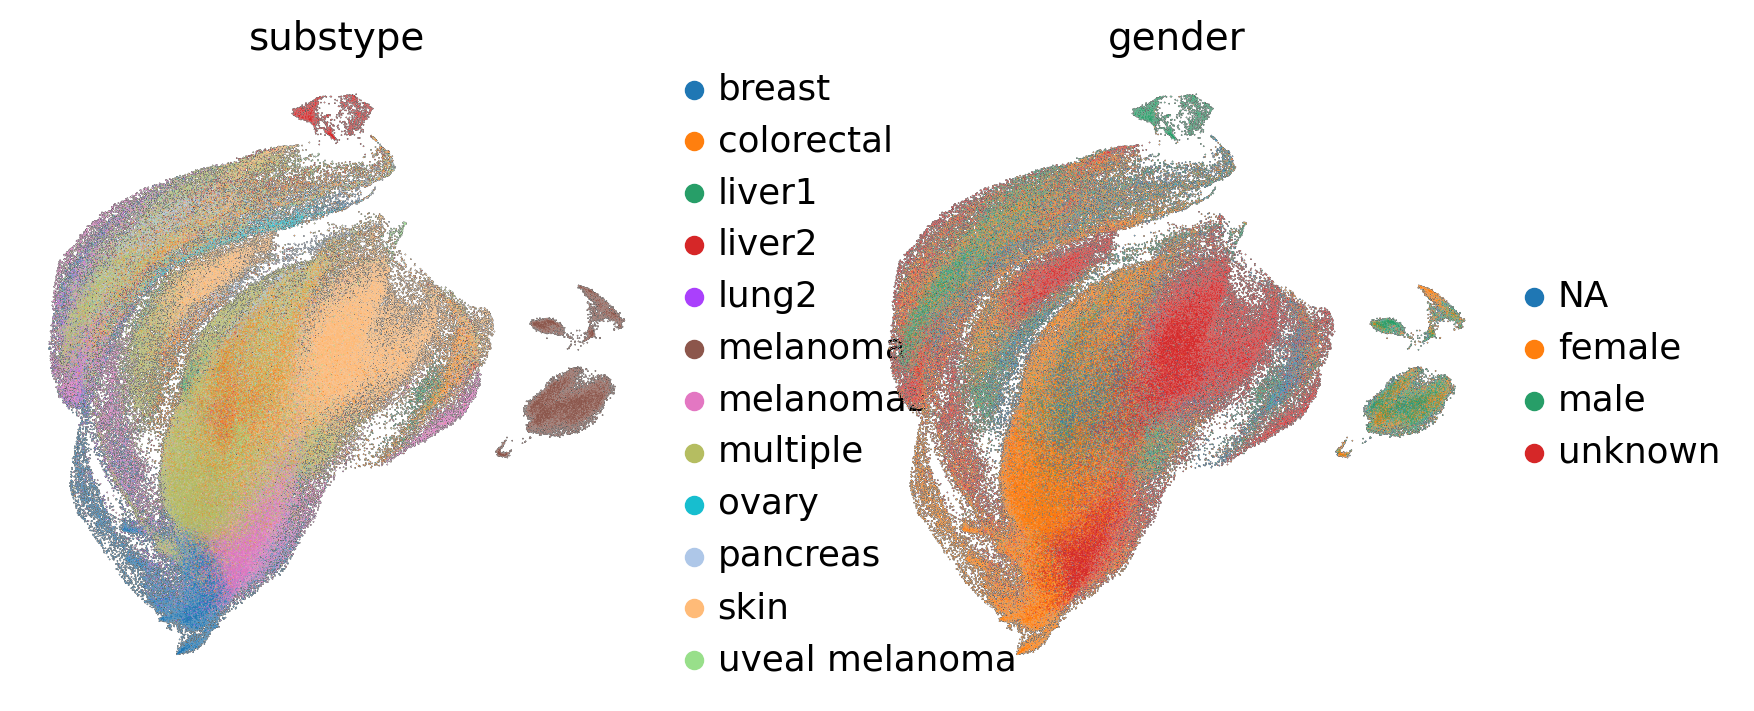

In [53]:
sc.pl.umap(adata, color=['source', "gender"]
           ,add_outline=True, title="substype")

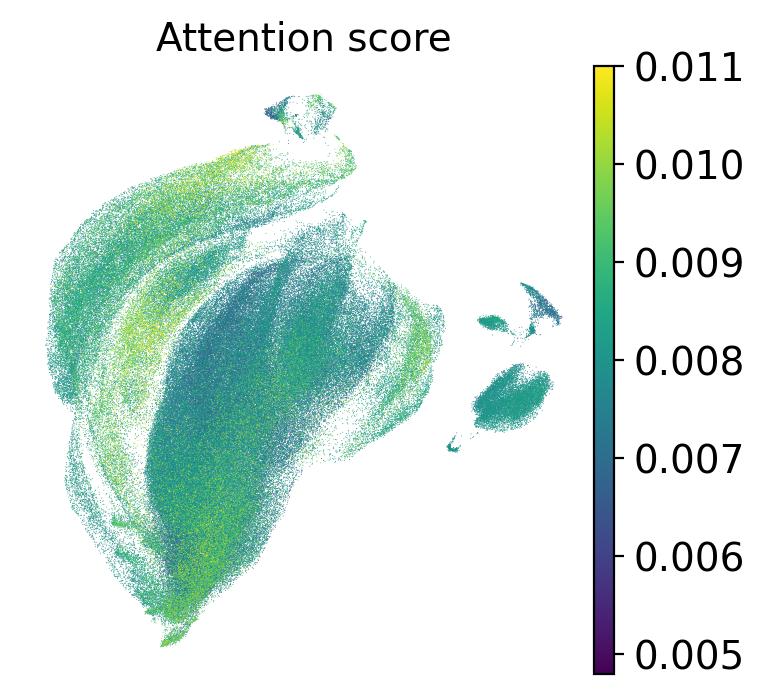

In [77]:
sc.pl.umap(adata, color=['cell_attn'],title="Attention score", vmax= 0.011)

In [65]:
adata.obs.cell_attn = list(adata.obs.cell_attn)

In [67]:
df = adata.obs[["cell_type","subtype","cell_attn"]]
# df = df.pivot_table(index='Status_on_day_collection_summary', columns='initial_clustering',values='cell_attn')

In [68]:
df_gp = df.groupby("cell_type")

In [69]:
df_mean = df_gp.mean()
df_mean.reset_index(level=0, inplace=True)

In [70]:
df_mean = df_mean.sort_values("cell_attn", ascending=False)

In [71]:
df_mean

cell_type  cell_attn
22                                      cDC   0.009026
0                                   B cells   0.008817
23                                      mDC   0.008756
21          Transitional memory CD4 T cells   0.008664
9                            Plasma B cells   0.008526
24                                      pDC   0.008470
3                                   M2 TAMs   0.008440
14  Proliferative monocytes and macrophages   0.008402
17                                SPP1 TAMs   0.008369
12                    Proliferative B cells   0.008360
11                      Proinflamatory TAMs   0.008255
4                                Mast cells   0.008249
5                                 Monocytes   0.008082
15           Recently activated CD4 T cells   0.007930
18                           T helper cells   0.007785
16                       Regulatory T cells   0.007784
2               Effector memory CD8 T cells   0.007725
19         Terminally exhausted CD8 T cells   0.007684
10                Pre-exhausted CD8 T cells   0.007578
6                                        NK   0.007515
13                    Proliferative T cells   0.007412
1                     Cytotoxic CD8 T cells   0.007401
8                  Naive-memory CD4 T cells   0.007381
20                               Th17 cells   0.007228
7                             Naive T cells   0.007140

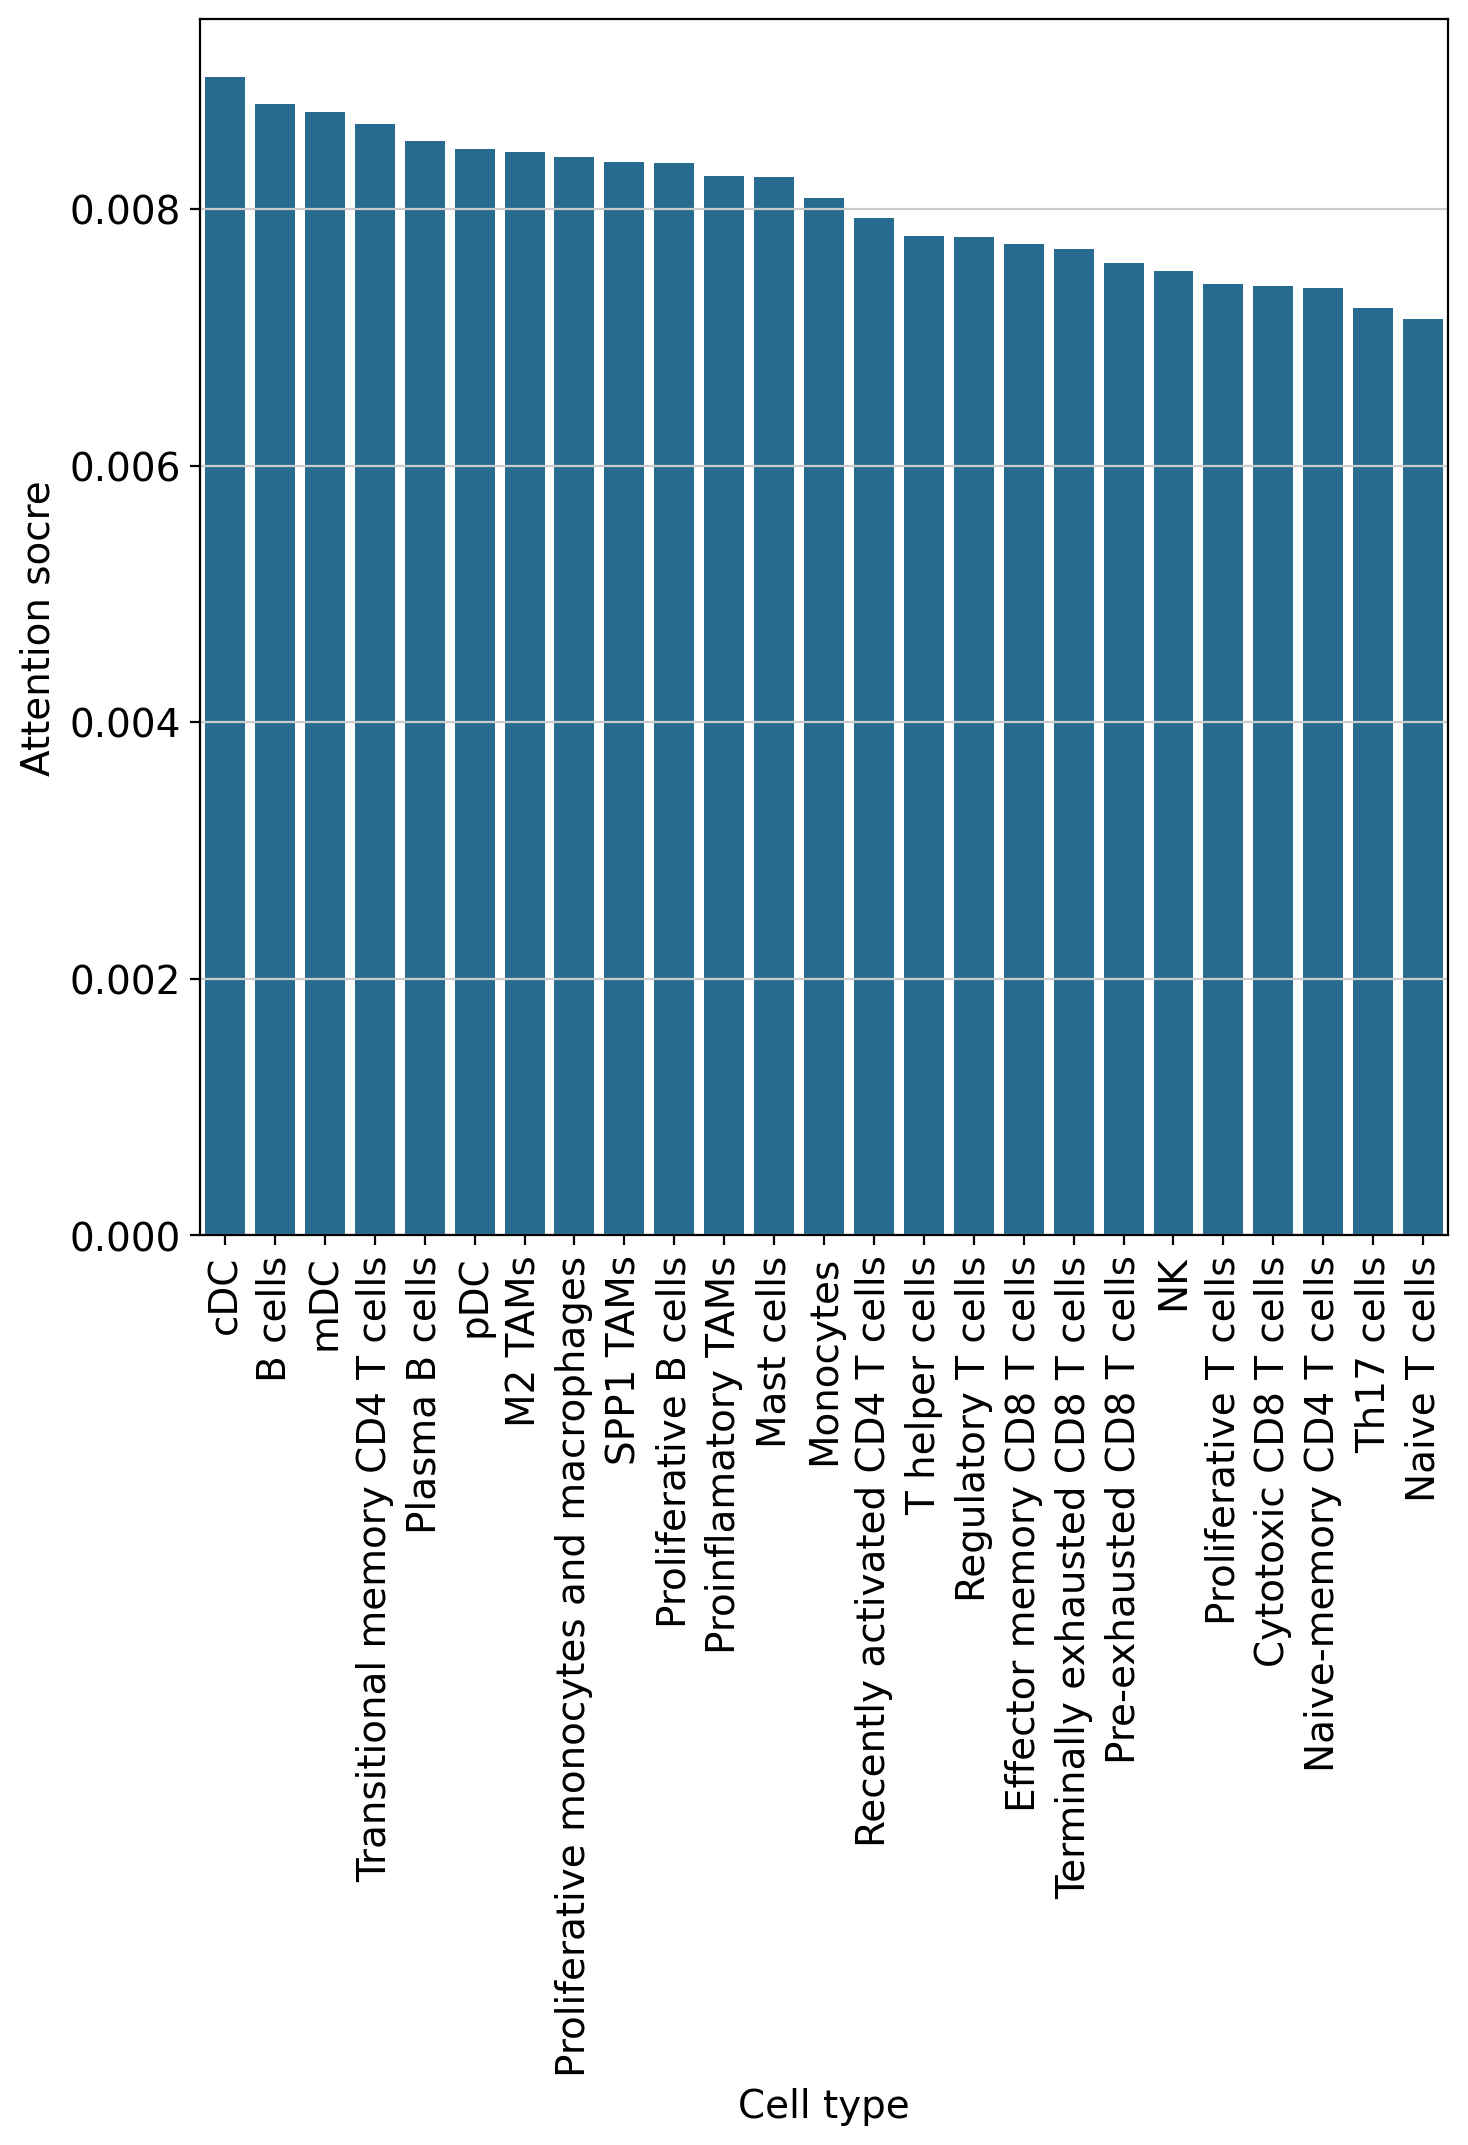

In [74]:
plt.figure(figsize = (8,8))
plt.xticks(rotation=90)
ax=  sns.barplot(x="cell_type", y="cell_attn", 
                 data=df_mean, color="#1572A1", order=list(df_mean["cell_type"]))
fig = ax.get_figure()
plt.ylabel("Attention socre")
plt.xlabel("Cell type")
fig.savefig("./figures/att_hanifa_ct.pdf")

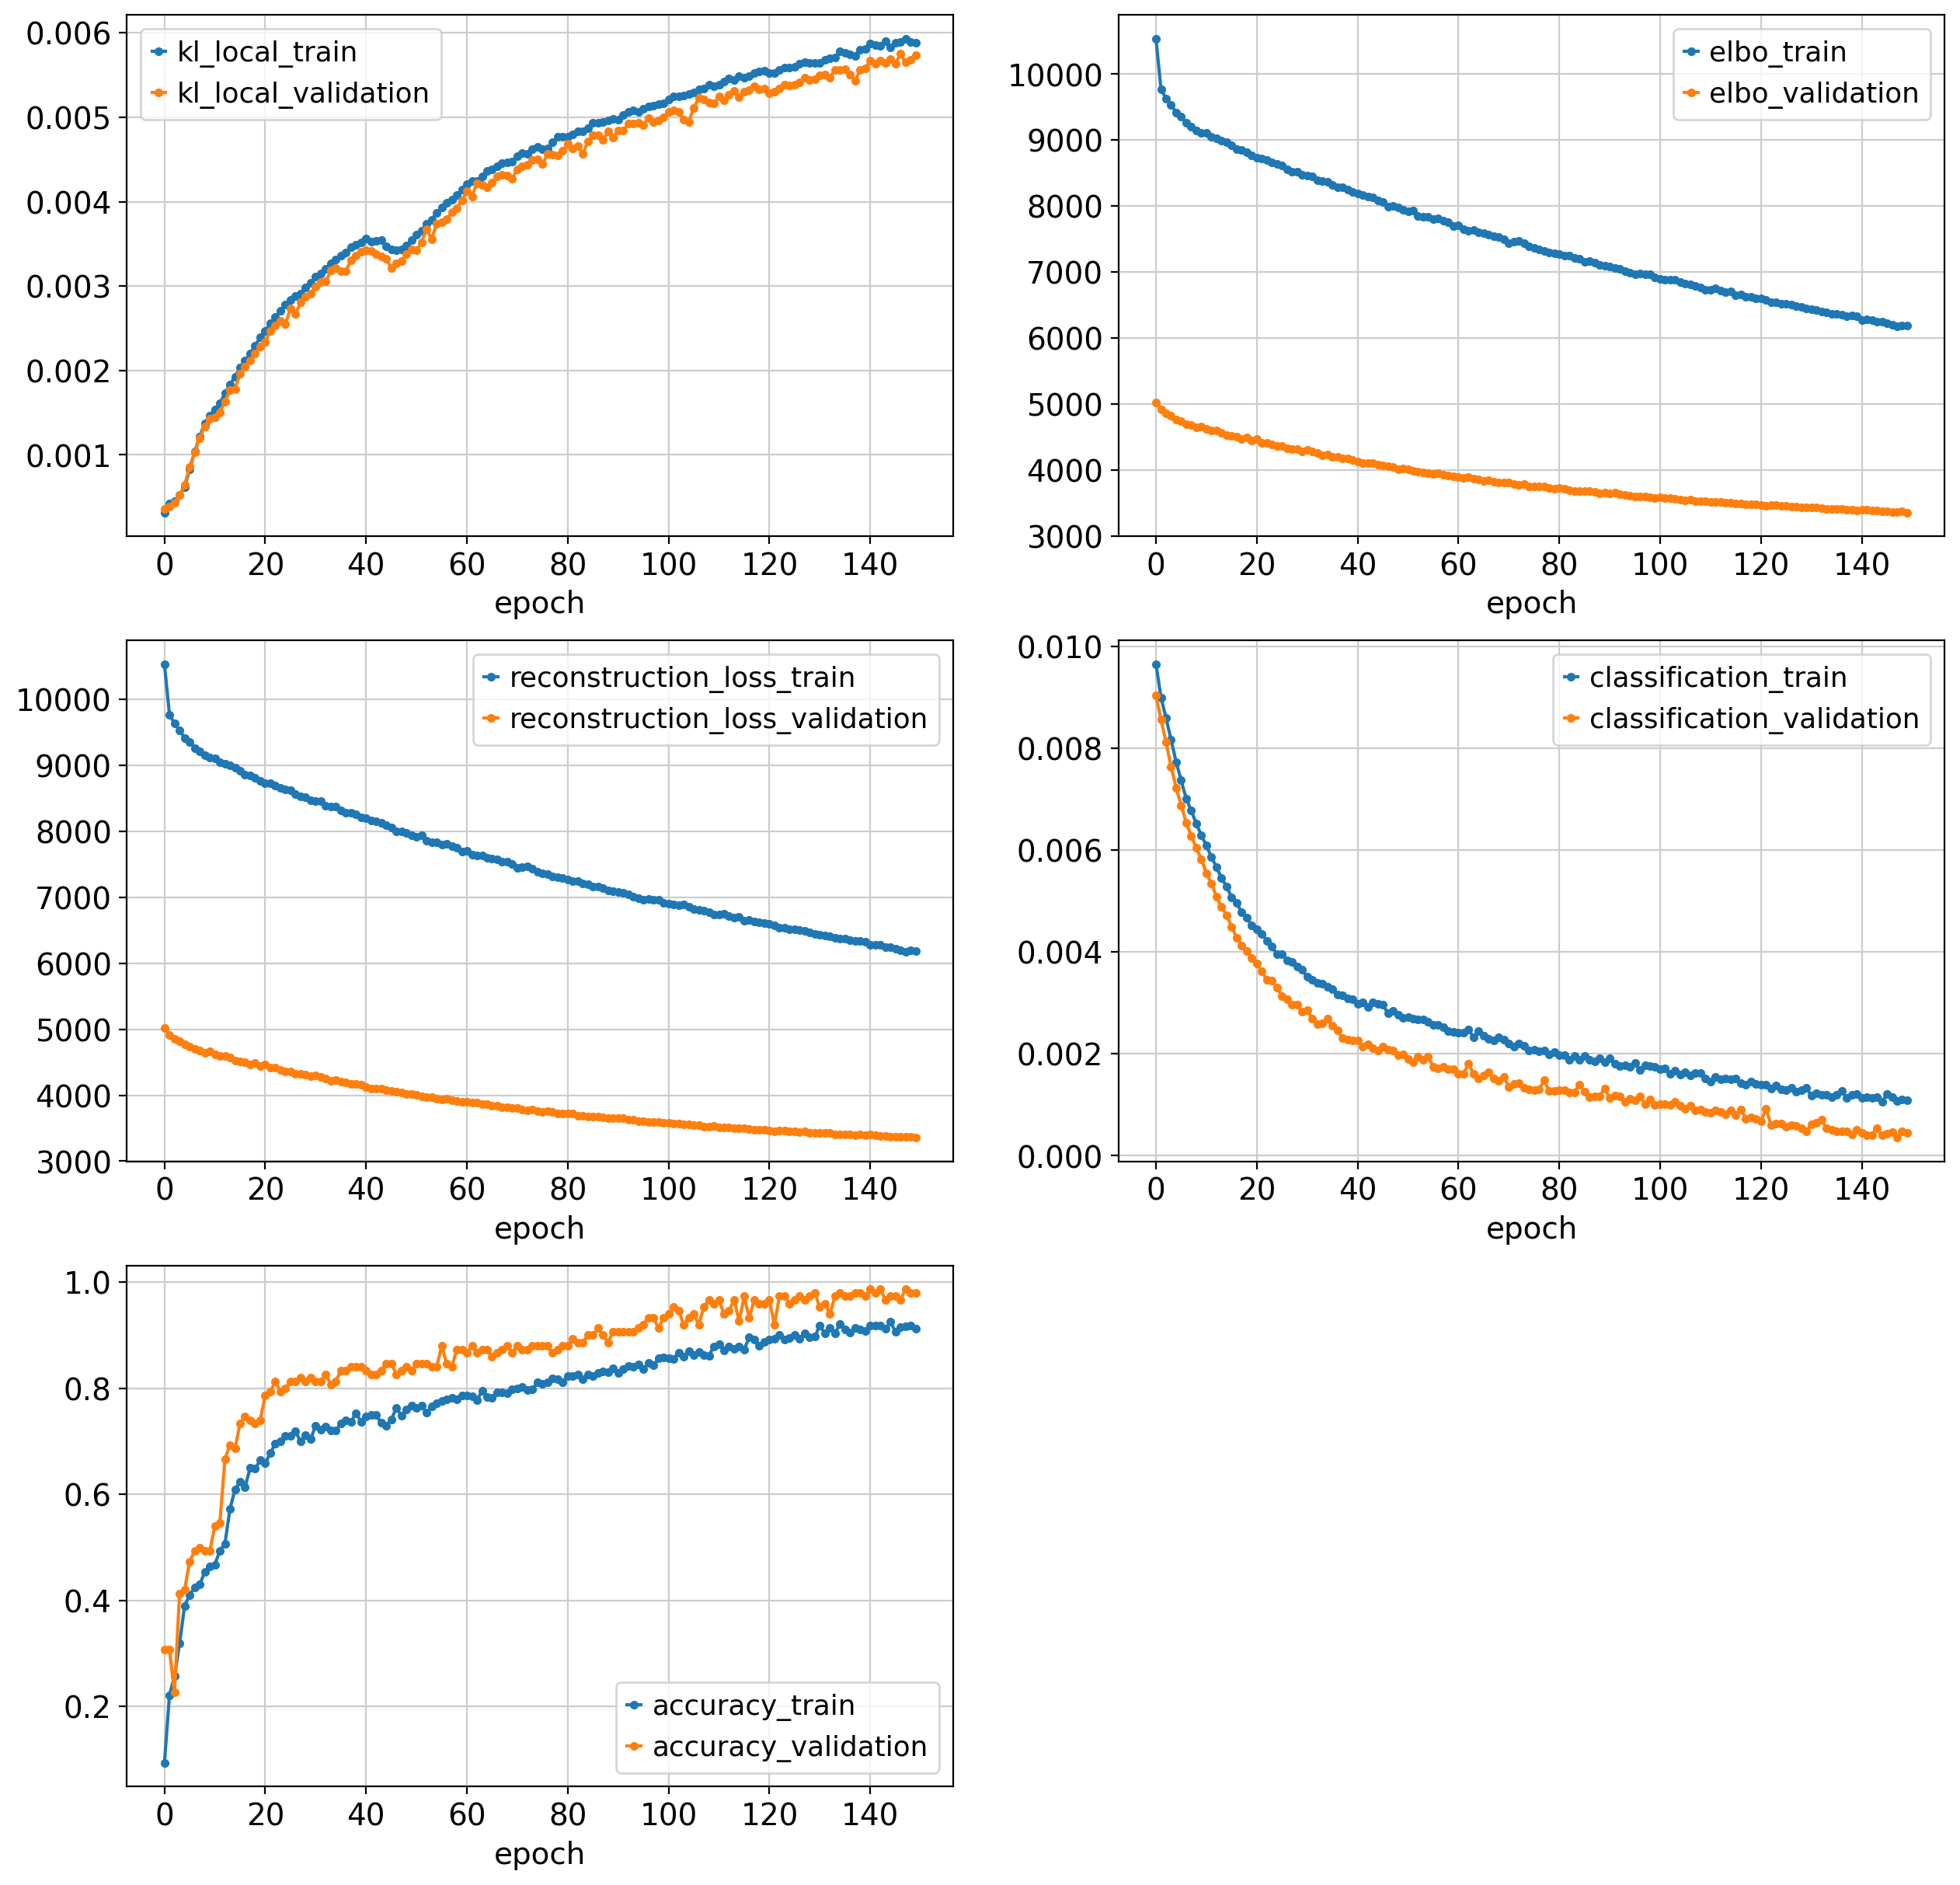

In [79]:
df = pd.DataFrame(mil.history['train_loss_step'])
for key in mil.history.keys():
    if key != 'train_loss_step':
        df = df.join(mil.history[key])

df['epoch'] = df.index

plt.figure(figsize=(15, 15))
loss_names = ['kl_local', 'elbo', 'reconstruction_loss', 'classification', 'accuracy']
nrows = 3

for i, name in enumerate(loss_names):
    plt.subplot(nrows, 2, i+1)
    plt.plot(df['epoch'], df[name+'_train'], '.-', label=name+'_train')
    plt.plot(df['epoch'], df[name+'_validation'], '.-', label=name+'_validation')
    plt.xlabel('epoch')
    plt.legend()

### predict on query data 

In [84]:
adata_test.obs

nCount_RNA  nFeature_RNA patient  percent.mt gender  \
GGTGAAGAGACCGGAT-9_5-1       3133.0           905  LIV1_8    3.925950   male   
GCAGCCATCTGCAAGT-9_5-1       9691.0          1941  LIV1_8    2.961511   male   
GCAGTTATCATTATCC-9_5-1      11431.0          2742  LIV1_8    3.656723   male   
GCATGATTCACGCATA-9_5-1       3262.0           987  LIV1_8    3.678725   male   
GCATGCGGTGAGGCTA-9_5-1       4601.0          1480  LIV1_8    5.368398   male   
...                             ...           ...     ...         ...    ...   
CGTCAGGTCAGTGTTG_9_17-1      1652.0           911    UM_9    6.355932   male   
CGTCAGGTCCTTAATC_9_17-1      1581.0           822    UM_9    4.174573   male   
CGTCCATAGCCAGTTT_9_17-1      1273.0           741    UM_9    4.241948   male   
CGTCCATAGCGCCTTG_9_17-1      1290.0           660    UM_9    4.108527   male   
CGTCAGGCATCCAACA_9_17-1      1043.0           661    UM_9    6.711409   male   

                                 source subtype cluster_kmeans_k6  \
GGTGAAGAGACCGGAT-9_5-1           liver1     HCC                NA   
GCAGCCATCTGCAAGT-9_5-1           liver1     HCC                NA   
GCAGTTATCATTATCC-9_5-1           liver1     HCC                NA   
GCATGATTCACGCATA-9_5-1           liver1     HCC                NA   
GCATGCGGTGAGGCTA-9_5-1           liver1     HCC                NA   
...                                 ...     ...               ...   
CGTCAGGTCAGTGTTG_9_17-1  uveal melanoma      UM                 2   
CGTCAGGTCCTTAATC_9_17-1  uveal melanoma      UM                 2   
CGTCCATAGCCAGTTT_9_17-1  uveal melanoma      UM                 2   
CGTCCATAGCGCCTTG_9_17-1  uveal melanoma      UM                 2   
CGTCAGGCATCCAACA_9_17-1  uveal melanoma      UM                 2   

                                                cell_type batch  group split  \
GGTGAAGAGACCGGAT-9_5-1                         Th17 cells  test      0  test   
GCAGCCATCTGCAAGT-9_5-1                                cDC  test      0  test   
GCAGTTATCATTATCC-9_5-1                            M2 TAMs  test      0  test   
GCATGATTCACGCATA-9_5-1        Effector memory CD8 T cells  test      0  test   
GCATGCGGTGAGGCTA-9_5-1                          Monocytes  test      0  test   
...                                                   ...   ...    ...   ...   
CGTCAGGTCAGTGTTG_9_17-1  Terminally exhausted CD8 T cells  test      0  test   
CGTCAGGTCCTTAATC_9_17-1             Cytotoxic CD8 T cells  test      0  test   
CGTCCATAGCCAGTTT_9_17-1          Naive-memory CD4 T cells  test      0  test   
CGTCCATAGCGCCTTG_9_17-1                         SPP1 TAMs  test      0  test   
CGTCAGGCATCCAACA_9_17-1  Terminally exhausted CD8 T cells  test      0  test   

                         _scvi_batch  _scvi_labels  
GGTGAAGAGACCGGAT-9_5-1             0             0  
GCAGCCATCTGCAAGT-9_5-1             0             0  
GCAGTTATCATTATCC-9_5-1             0             0  
GCATGATTCACGCATA-9_5-1             0             0  
GCATGCGGTGAGGCTA-9_5-1             0             0  
...                              ...           ...  
CGTCAGGTCAGTGTTG_9_17-1            0             0  
CGTCAGGTCCTTAATC_9_17-1            0             0  
CGTCCATAGCCAGTTT_9_17-1            0             0  
CGTCCATAGCGCCTTG_9_17-1            0             0  
CGTCAGGCATCCAACA_9_17-1            0             0  

[43397 rows x 14 columns]

In [85]:
adata

AnnData object with n_obs × n_vars = 273714 × 4000
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient', 'percent.mt', 'gender', 'source', 'subtype', 'cluster_kmeans_k6', 'cell_type', 'batch', 'group', 'split', 'size_factors', '_scvi_batch', '_scvi_labels', 'cell_attn'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', '_scvi', 'neighbors', 'umap', 'cell_type_colors', 'subtype_colors', 'source_colors', 'gender_colors'
    obsm: 'X_umap', '_scvi_extra_categoricals', '_scvi_extra_continuous', 'latent', 'X_pca'
    layers: 'count'
    obsp: 'distances', 'connectivities'

In [80]:
mil_out_test = mil.get_latent_representation(adata_test, batch_size=256)
latent_test, cell_attn_test, cov_attn_test, x = mil_out_test

INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


/home/mo/miniconda3/envs/multigrate/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function transfer_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.INFO     .obs[_scvi_batch] not found in target, assuming every cell is same category         

INFO     .obs[_scvi_labels] not found in target, assuming every cell is same category        
INFO     Using data from adata.X                                                             


AssertionError: size_factors is not a valid key for in adata.obs

In [78]:
overal = non_heatlhy_df.groupby("cell_type").mean()
overal = overal.reset_index()

NameError: name 'non_heatlhy_df' is not defined

In [ ]:
overal = overal

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


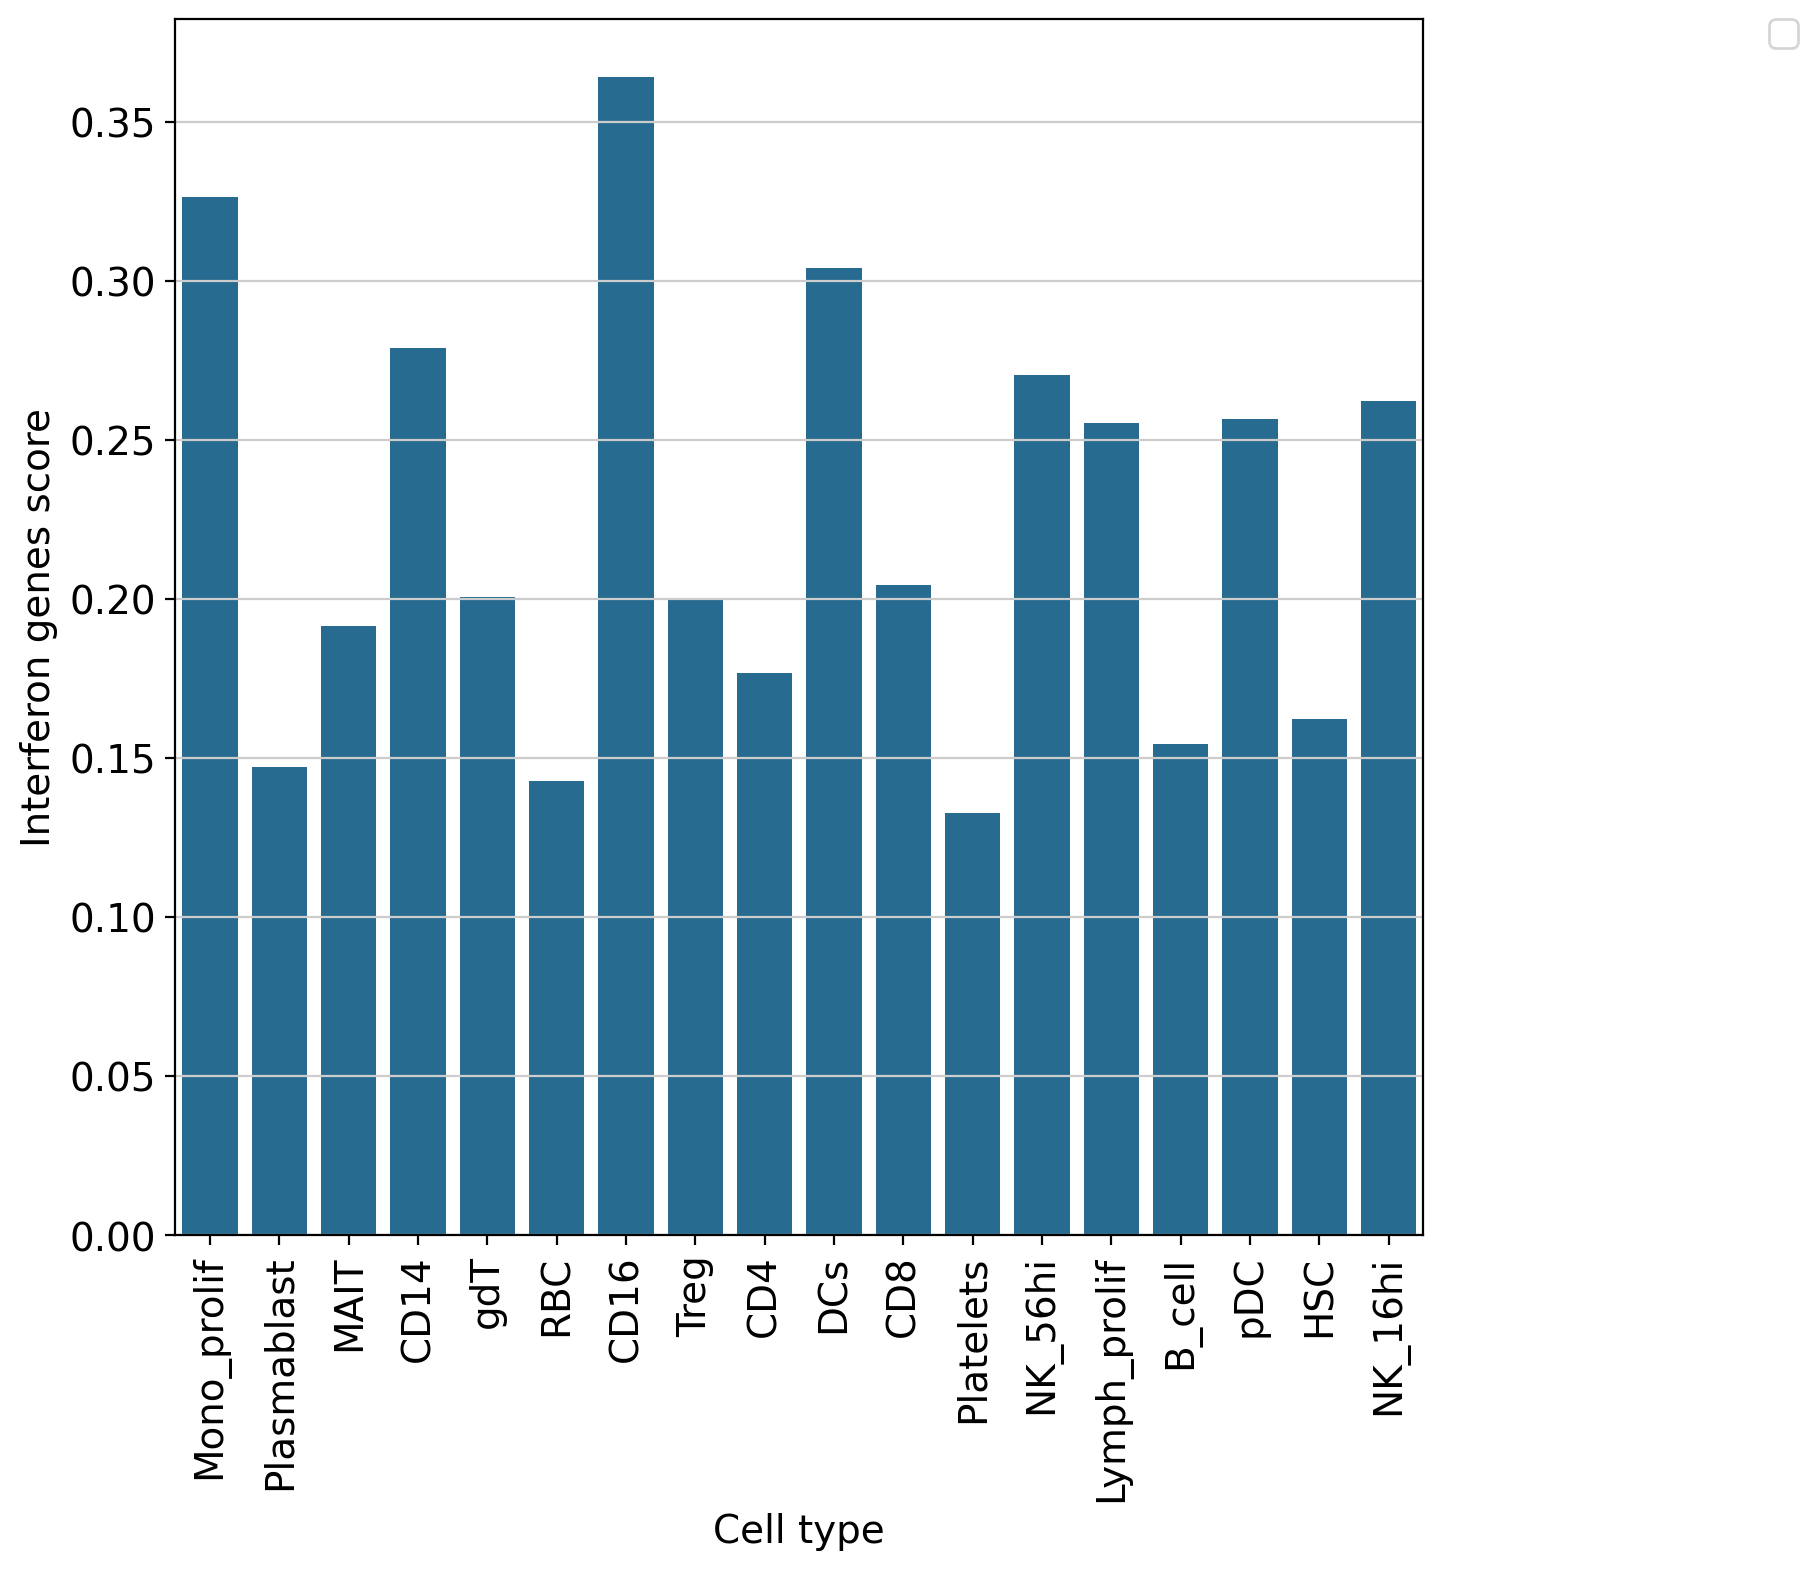

In [211]:
plt.figure(figsize = (8,8))
plt.xticks(rotation=90)
sns.barplot(x="initial_clustering", y="score",
            data= overal,
            hue_order=order, color="#1572A1", order=list(df_mean["initial_clustering"]))
plt.ylabel("Interferon genes score")
plt.xlabel("Cell type")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0)
fig = ax.get_figure()
fig.savefig("./figures/att_hanifa_ct_lfc.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


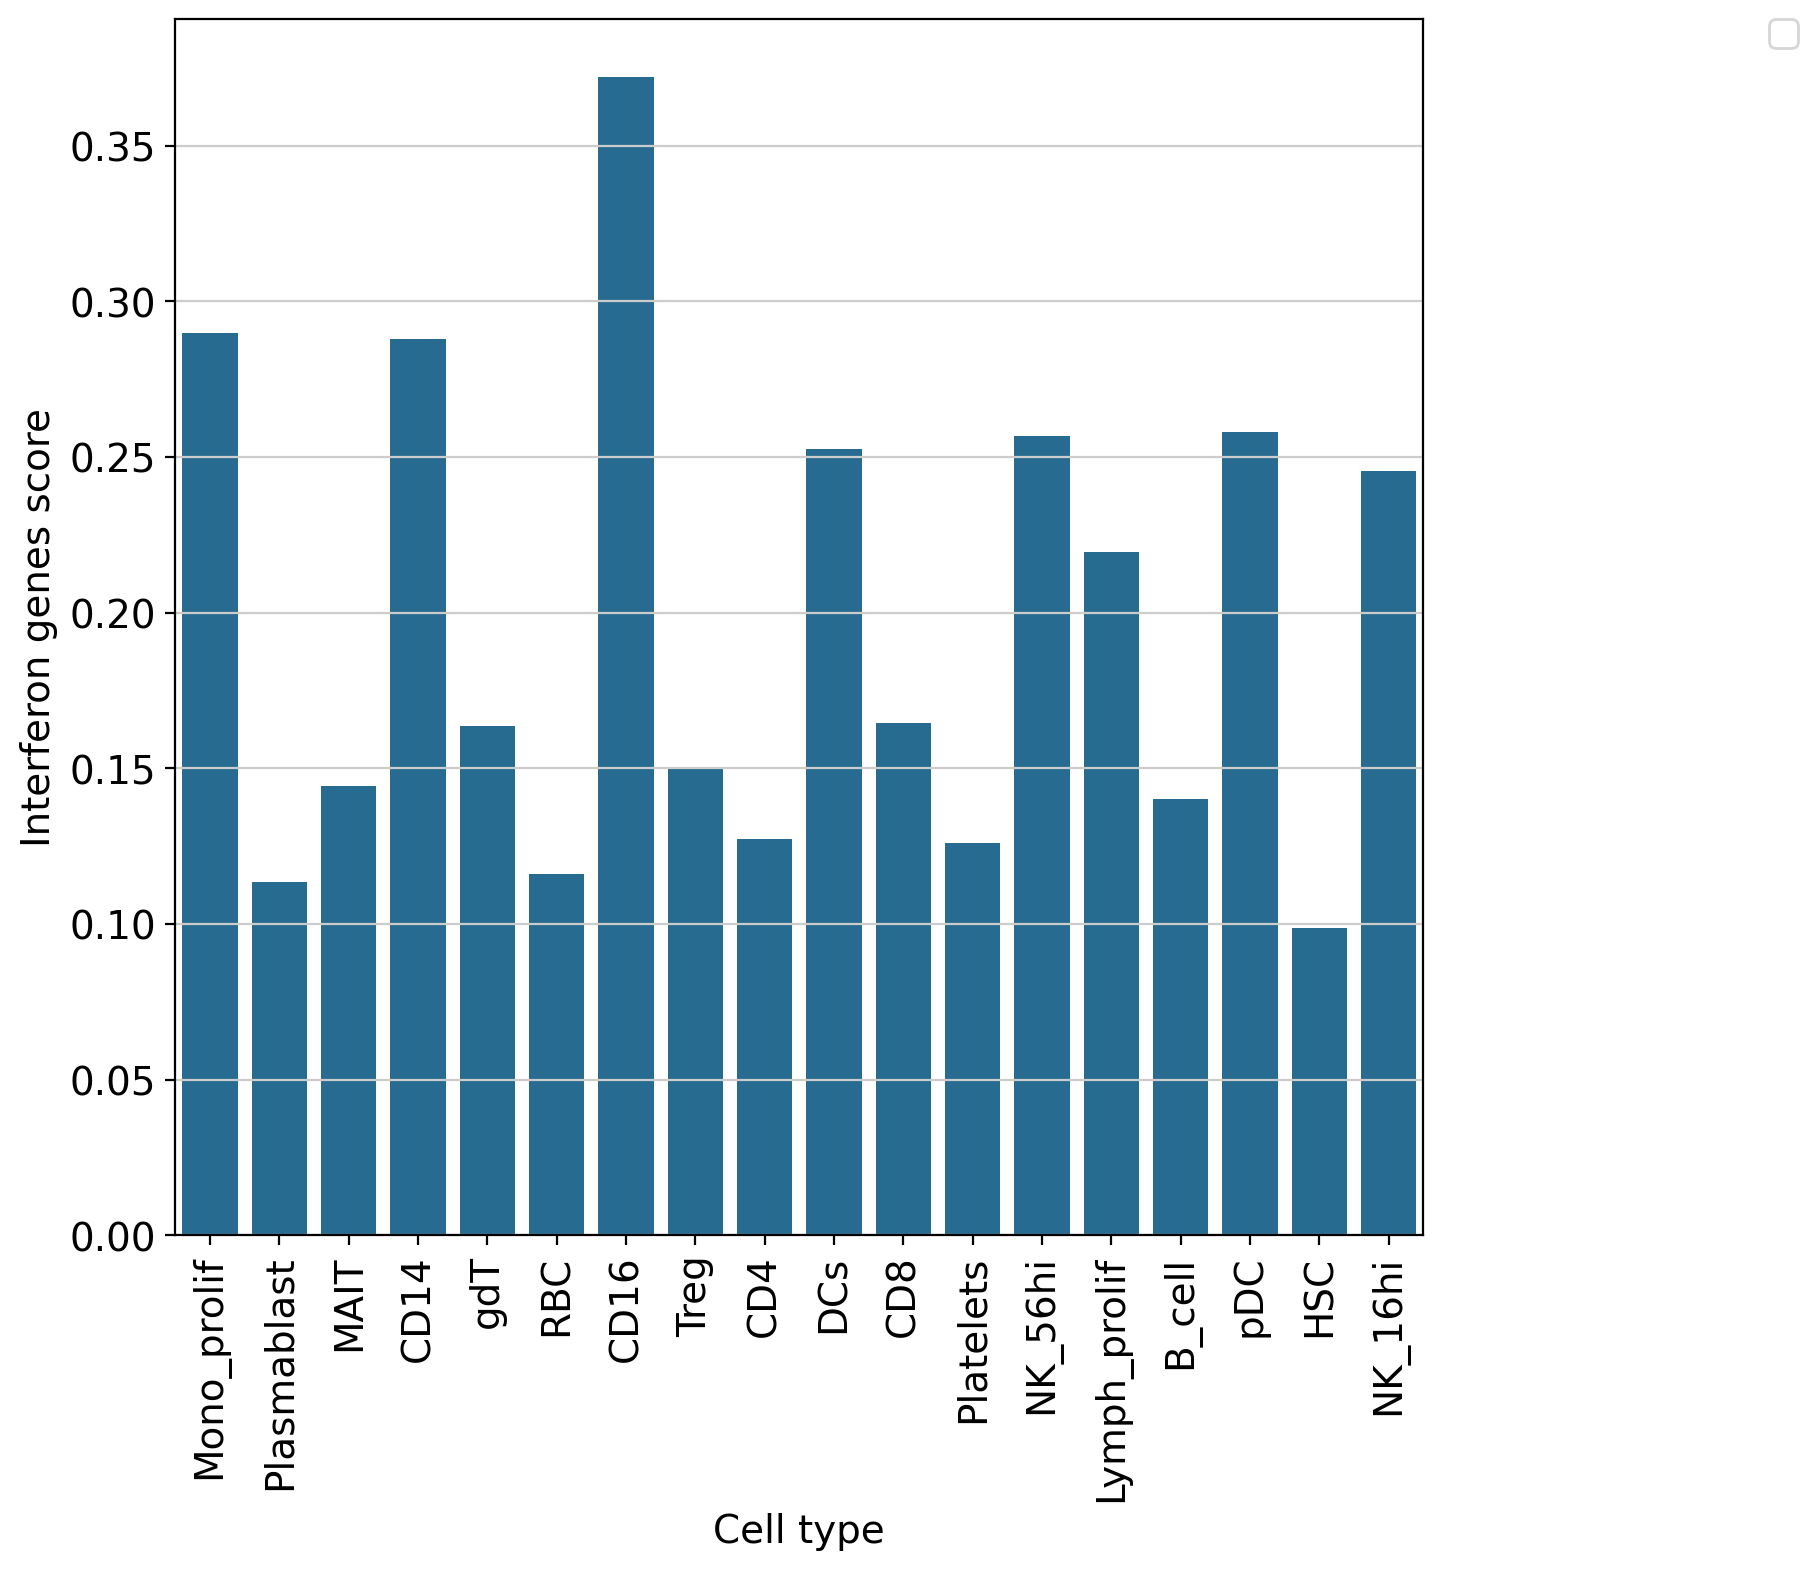

In [212]:
plt.figure(figsize = (8,8))
plt.xticks(rotation=90)
sns.barplot(x="initial_clustering", y="biger_list",
            data= overal,
            hue_order=order, color="#1572A1", order=list(df_mean["initial_clustering"]))
plt.ylabel("Interferon genes score")
plt.xlabel("Cell type")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0)
fig = ax.get_figure()
fig.savefig("./figures/att_hanifa_ct_lfc.pdf")

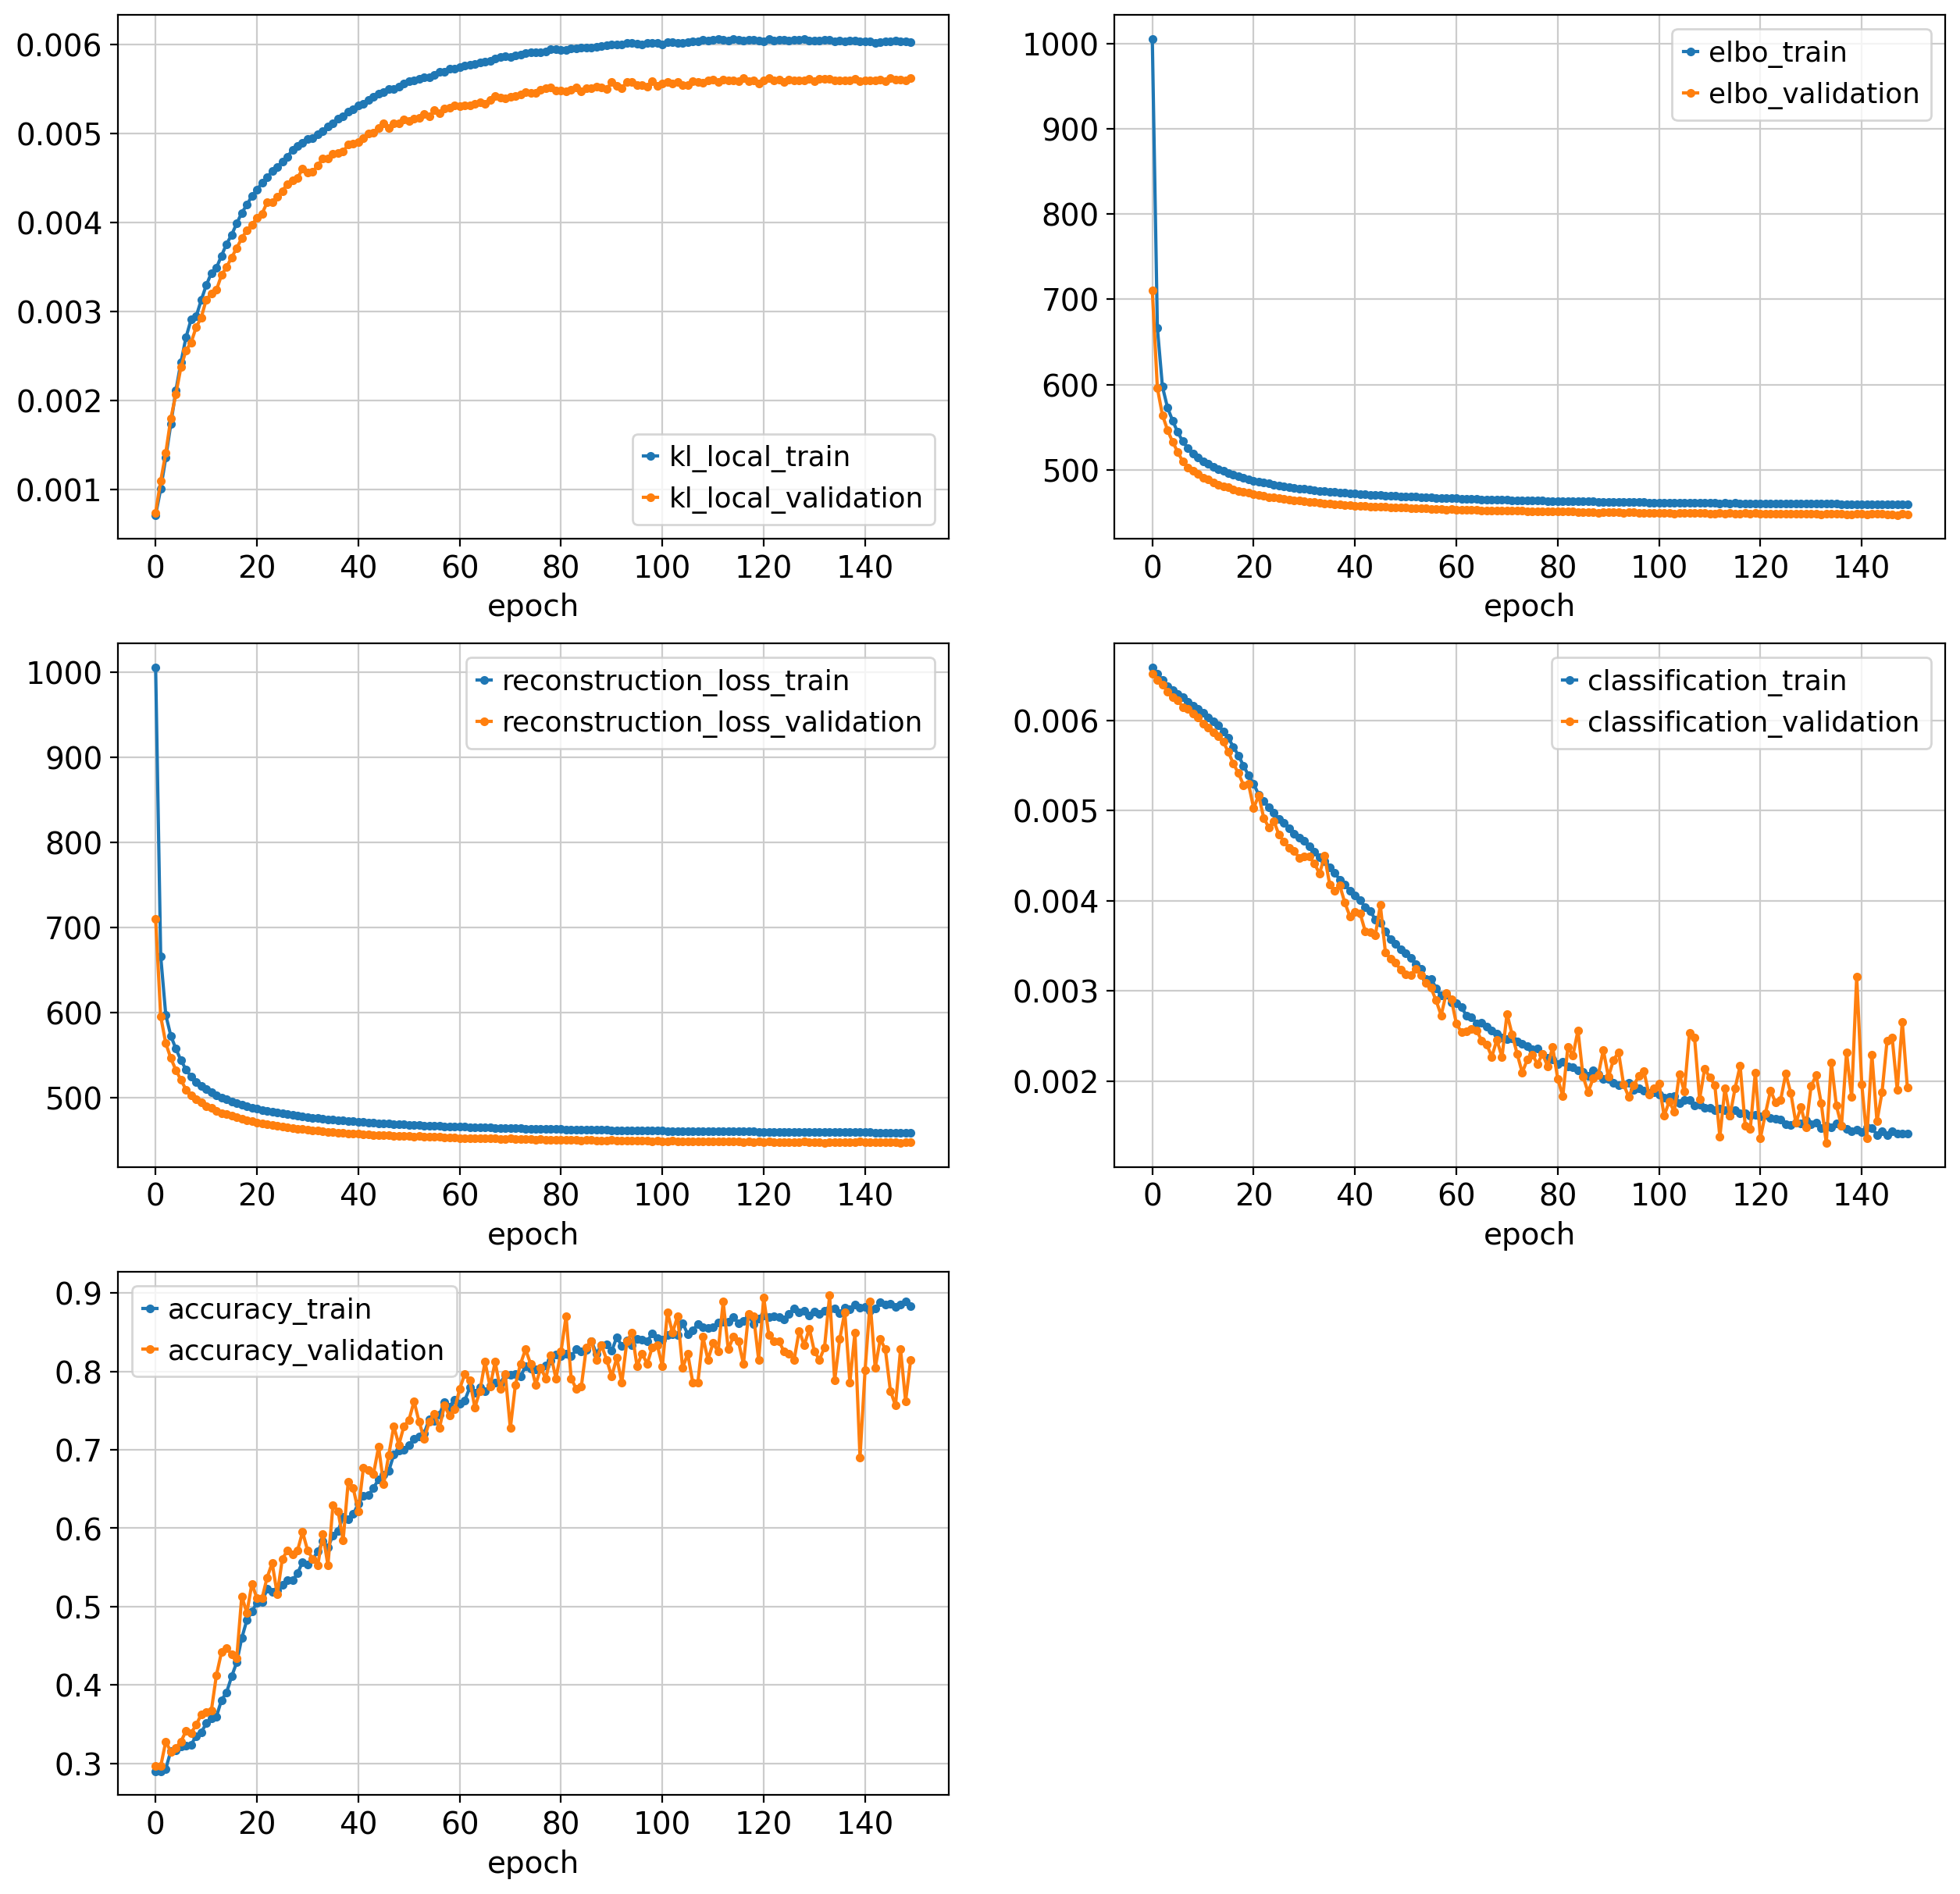

In [63]:
# df = pd.DataFrame(mil.history['train_loss_step'])
# for key in mil.history.keys():
#     if key != 'train_loss_step':
#         df = df.join(mil.history[key])

# df['epoch'] = df.index

# plt.figure(figsize=(15, 15))
# loss_names = ['kl_local', 'elbo', 'reconstruction_loss', 'classification', 'accuracy']
# nrows = 3

# for i, name in enumerate(loss_names):
#     plt.subplot(nrows, 2, i+1)
#     plt.plot(df['epoch'], df[name+'_train'], '.-', label=name+'_train')
#     plt.plot(df['epoch'], df[name+'_validation'], '.-', label=name+'_validation')
#     plt.xlabel('epoch')
#     plt.legend()